In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load dataset and display basic info
df = pd.read_csv("Churn_Modelling.csv")
print("Dataset Preview:")
print(df.head())

print("\nDataset Summary:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())


Dataset Preview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       

In [5]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [6]:
# Splitting dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Exited'])
y = df['Exited']

# Use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Scaling features using StandardScaler (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Building an optimized neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Adding dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Building an optimized neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  # Adding dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Training the neural network model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, verbose=1)

# Evaluating model performance
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6913 - loss: 0.5680 - val_accuracy: 0.8110 - val_loss: 0.4184
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8072 - loss: 0.4394 - val_accuracy: 0.8290 - val_loss: 0.3986
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8274 - loss: 0.4102 - val_accuracy: 0.8470 - val_loss: 0.3741
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8367 - loss: 0.3935 - val_accuracy: 0.8525 - val_loss: 0.3630
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.3835 - val_accuracy: 0.8555 - val_loss: 0.3577
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8483 - loss: 0.3679 - val_accuracy: 0.8555 - val_loss: 0.3548
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8546 - loss: 0.3566 - val_accuracy: 0.8570 - val_loss: 0.3552
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8507 - loss: 0.3634 - val_accuracy: 0.

In [12]:
model.layers[0].get_weights()

[array([[-1.45260021e-02, -1.80504218e-01,  2.97601130e-02,
          8.05260241e-02, -8.50017518e-02,  3.27837430e-02,
          3.80761139e-02,  6.43878477e-03,  1.00054428e-01,
         -3.74200009e-02, -4.61296104e-02,  1.17167898e-01,
         -9.60189253e-02,  9.11851823e-02,  8.91341493e-02,
          1.43910907e-02, -1.52960584e-01, -1.03564253e-02,
         -1.59016997e-01, -1.61547706e-01,  1.05514467e-01,
          2.39069492e-01,  2.93252748e-02, -6.13995548e-03,
         -2.02982835e-02, -2.07163543e-01,  3.40824202e-02,
          2.44191170e-01,  1.52291551e-01, -1.12581858e-03,
         -5.53801982e-03,  1.11293092e-01,  5.14298677e-02,
          1.11032054e-01, -8.85917172e-02, -8.69329721e-02,
         -9.42957476e-02,  1.27105236e-01, -7.23623857e-02,
         -1.28786918e-02,  3.42421122e-02, -7.91641623e-02,
         -8.04076791e-02, -3.49457860e-02, -1.87957078e-01,
         -1.51482224e-02, -9.95437894e-03, -4.02400717e-02,
         -6.03946298e-03,  6.40708581e-0

In [13]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8635

In [16]:
import matplotlib.pyplot as plt
print(history.history)

{'accuracy': [0.7739999890327454, 0.8186249732971191, 0.8323749899864197, 0.8410000205039978, 0.84375, 0.8496249914169312, 0.8479999899864197, 0.8485000133514404, 0.8503749966621399, 0.8504999876022339, 0.8533750176429749, 0.8566250205039978, 0.8556249737739563, 0.8535000085830688, 0.8514999747276306, 0.8587499856948853, 0.8575000166893005, 0.8572499752044678, 0.8572499752044678, 0.8578749895095825, 0.8565000295639038, 0.862500011920929, 0.8611249923706055, 0.8604999780654907, 0.8612499833106995, 0.8633750081062317, 0.8617500066757202, 0.8586249947547913, 0.859499990940094, 0.8616250157356262, 0.8613749742507935, 0.8617500066757202, 0.8616250157356262, 0.859000027179718, 0.8606250286102295, 0.8631250262260437, 0.8640000224113464, 0.859499990940094, 0.8608750104904175, 0.8647500276565552, 0.8636249899864197, 0.8642500042915344, 0.8636249899864197, 0.8622499704360962, 0.8657500147819519, 0.8643749952316284, 0.8631250262260437, 0.8648750185966492, 0.8650000095367432, 0.862500011920929], '

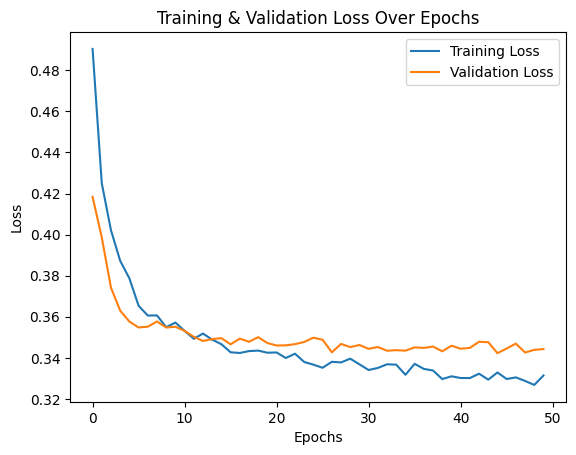

In [20]:
import matplotlib.pyplot as plt

# Plot loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and labels
plt.title('Training & Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()

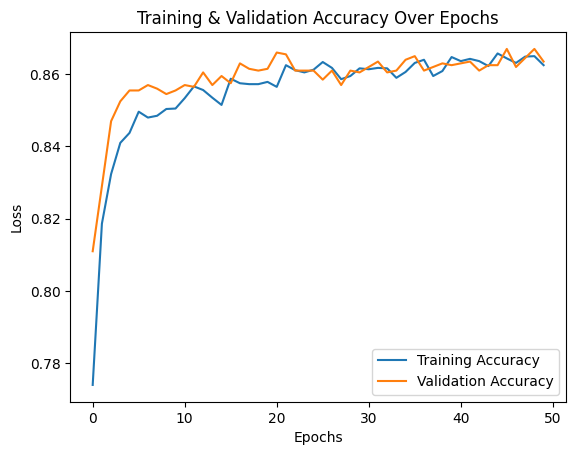

In [21]:
# Plot loss values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add title and labels
plt.title('Training & Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()